In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# !unzip "/content/drive/MyDrive/Potato-20220304T040717Z-001.zip" -d "/content"
!unrar x "/content/drive/MyDrive/Potato.rar" "/content/Potato/"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/Potato.rar


Would you like to replace the existing file /content/Potato/augmented_healthy/aug_healthy_0_2487.png
 35820 bytes, modified on 2022-08-18 16:19
with a new one
 35820 bytes, modified on 2022-08-18 16:19

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit E

All OK


In [3]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import random
random.seed(4)

(256, 256, 3)


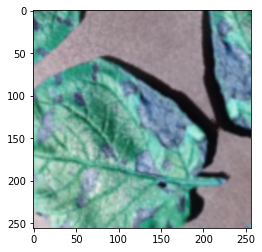

In [4]:
data_path = '/content/Potato/'
# valid_path = '/content/drive/MyDrive/Potato/Validation'
categories = os.listdir(data_path)
for category in categories:
  path = os.path.join(data_path, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img))
    new_array = cv2.resize(img_array, (256, 256))
    print(np.array(new_array).shape)
    plt.imshow(new_array, cmap='gray')
    break
  break

In [5]:
IMG_SIZE = 224

training_set = []

for category in categories:
  path = os.path.join(data_path, category)
  index = categories.index(category)
  for img in tqdm(os.listdir(path)):
    try:
      img_array = cv2.imread(os.path.join(path, img))
      new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
      training_set.append([new_array, index])
    except Exception as e:
        pass


100%|██████████| 1561/1561 [00:02<00:00, 618.78it/s]


In [6]:
random.shuffle(training_set)

In [7]:
x_train = []
y_train = []

for img_array, label in training_set:
  x_train.append(img_array)
  y_train.append(label)

In [8]:
np.array(x_train).shape

(4682, 224, 224, 3)

In [9]:
X_train =  np.array(x_train).reshape(-1,IMG_SIZE, IMG_SIZE, 3)
y_train = np.array(y_train)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,
                                                    test_size = 0.2,
                                                    random_state = 1)

In [11]:
X_test =  np.array(X_test).reshape(-1,IMG_SIZE, IMG_SIZE, 3)
y_test = np.array(y_test)

In [12]:
X_train = X_train/255.0

In [13]:
X_train.shape

(3745, 224, 224, 3)

In [14]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.inception_resnet_v2 import preprocess_input
from keras.preprocessing import image
# from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob

In [15]:
resnet = InceptionResNetV2(input_shape=(IMG_SIZE,IMG_SIZE,3), weights='imagenet', include_top=False)

In [16]:
for layer in resnet.layers:
  layer.trainable = False

In [17]:
folders = glob('/content/Potato/*')

In [18]:
x = Flatten()(resnet.output)

In [19]:
prediction = Dense(len(folders), activation='softmax')(x)

In [20]:
model = Model(inputs=resnet.input, outputs=prediction)

In [21]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [22]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
model.fit(X_train, y_train, batch_size=4, epochs=15, validation_data=(X_test, y_test))


Epoch 1/15
937/937 [==============================] - 76s 59ms/step - loss: 1.8788 - accuracy: 0.8262 - val_loss: 5747.0625 - val_accuracy: 0.3191
Epoch 2/15
937/937 [==============================] - 54s 58ms/step - loss: 0.8633 - accuracy: 0.9316 - val_loss: 5295.6504 - val_accuracy: 0.3191
Epoch 3/15
937/937 [==============================] - 52s 56ms/step - loss: 0.8582 - accuracy: 0.9415 - val_loss: 3409.3513 - val_accuracy: 0.3874
Epoch 4/15
937/937 [==============================] - 53s 57ms/step - loss: 0.6426 - accuracy: 0.9578 - val_loss: 5533.9946 - val_accuracy: 0.3767
Epoch 5/15
937/937 [==============================] - 52s 55ms/step - loss: 0.4789 - accuracy: 0.9674 - val_loss: 5852.5557 - val_accuracy: 0.2753
Epoch 6/15
937/937 [==============================] - 52s 56ms/step - loss: 0.3367 - accuracy: 0.9773 - val_loss: 6002.1919 - val_accuracy: 0.2348
Epoch 7/15
937/937 [==============================] - 51s 55ms/step - loss: 0.5630 - accuracy: 0.9666 - val_loss: 8946

In [ ]:
break

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.callbacks import TensorBoard
import time
%load_ext tensorboard


In [ ]:
%tensorboard --logdir logs

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np